In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

[*********************100%%**********************]  2 of 2 completed


(<Axes: >, <Axes: xlabel='Date'>)

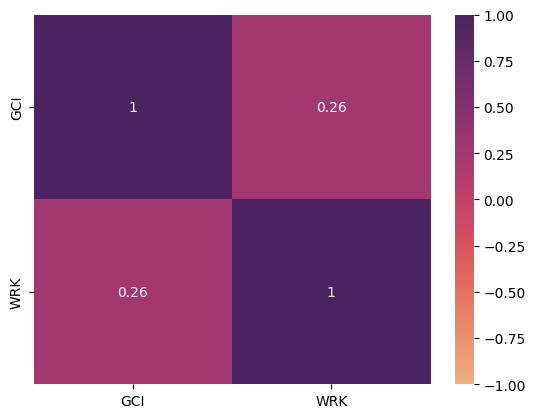

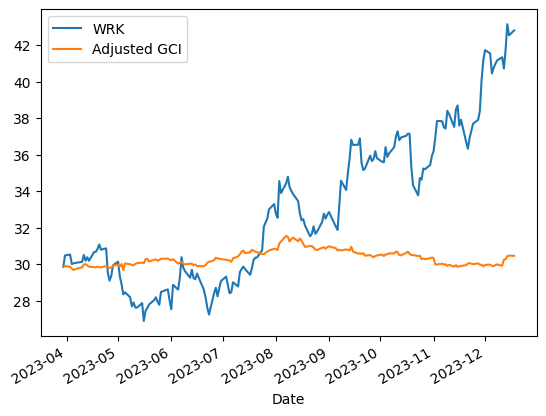

In [33]:
def correlation_Matrix(Tickers, Start, End, Interval):
    portfolio_tickers = Tickers
    start = Start
    end = End
    rawData = yf.download(tickers=portfolio_tickers,start=start, end =end, interval =Interval )
    rawData = rawData["Close"]
    
    diffirenced_data = rawData.pct_change()
    corr_matrix = diffirenced_data.corr()
    
    if rawData.iloc[0,0] < rawData.iloc[0,1]:
        diffirence = rawData.iloc[0,1] - rawData.iloc[0,0]
        rawData[f"Adjusted {rawData.columns[0]}"] = rawData.iloc[:,0] + diffirence
        rawData.drop(rawData.columns[0], axis = 1, inplace=True)
    else:
        diffirence = rawData.iloc[0,0] - rawData.iloc[0,1]
        rawData[f"Adjusted {rawData.columns[1]}"] = rawData.iloc[:,1] + diffirence
        rawData.drop(rawData.columns[1], axis = 1, inplace=True)
    #return corr_matrix
    return sns.heatmap(corr_matrix,cmap="flare", vmin=-1.0, vmax=1.0, annot = True ), rawData.plot()
    
correlation_Matrix(Tickers = ["GCI","WRK"], Start = "2023-03-30", End = "2023-12-19", Interval = "1d")


In [40]:
yourName = input("Type a name")
print(yourName)